GUNGUN JAIN T085
# Reducing Features Using Principal Components

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Load the data
df = pd.read_csv("Latest 2025 movies Datasets.csv")

# Keep only numeric columns for PCA
numeric_df = df.select_dtypes(include='number')

# Standardize
X = StandardScaler().fit_transform(numeric_df)

# PCA to retain 99% variance
pca = PCA(n_components=0.99, whiten=True)

# Fit PCA
X_pca = pca.fit_transform(X)

# Output sizes
print('Original number of numeric features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])


Original number of numeric features: 9
Reduced number of features: 8


## Reducing Features When Data Is Linearly Inseparable

In [3]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/embedded_system_network_security_dataset.csv")

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Standardize the numeric features
X = StandardScaler().fit_transform(numeric_df)

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

# Output sizes
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_kpca.shape[1])


Original number of features: 9
Reduced number of features: 1


Numeric columns found: ['packet_size', 'inter_arrival_time', 'src_port', 'dst_port', 'packet_count_5s', 'mean_packet_size', 'spectral_entropy', 'frequency_band_energy', 'label']


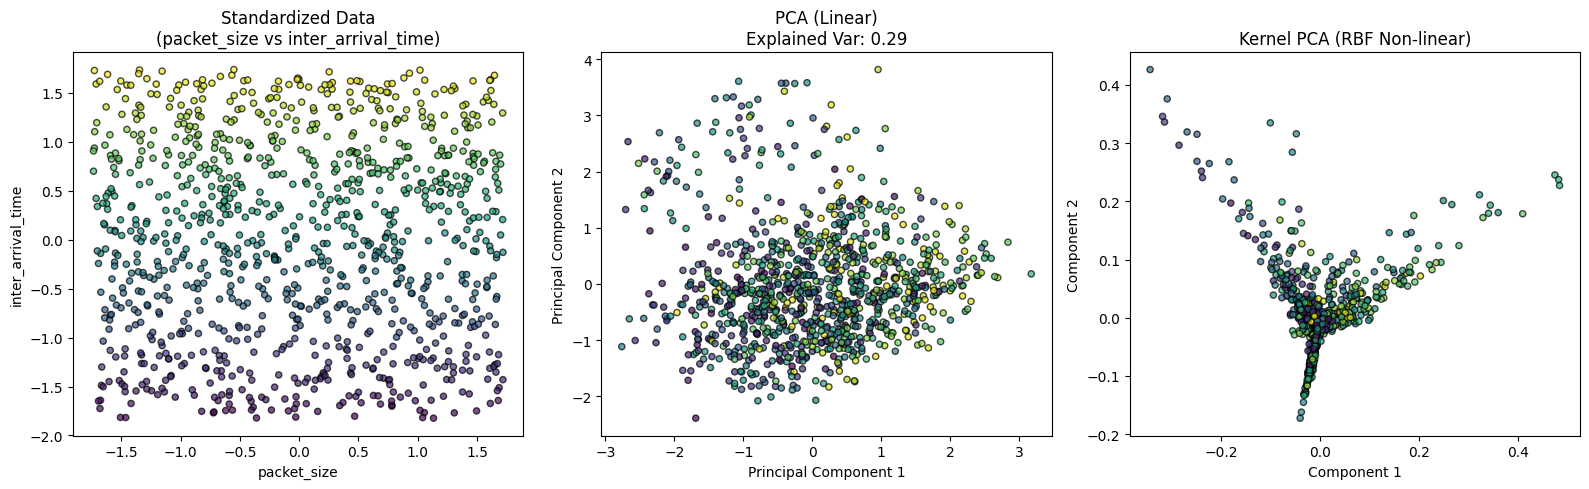

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

# ==========================================
# 1. LOAD YOUR DATASET
# ==========================================
df = pd.read_csv("/content/embedded_system_network_security_dataset.csv")

# ==========================================
# 2. PREPROCESSING
# ==========================================

# Remove "Unnamed" columns if they exist
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Keep only numeric columns
numeric_df = df.select_dtypes(include='number')

# Handle missing values
numeric_df = numeric_df.dropna()

print("Numeric columns found:", numeric_df.columns.tolist())

# Standardize data
X = StandardScaler().fit_transform(numeric_df)

# ==========================================
# 3. DIMENSIONALITY REDUCTION
# ==========================================

# PCA (Linear)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Kernel PCA (Non-linear)
kpca = KernelPCA(kernel="rbf", gamma=1, n_components=2)
X_kpca = kpca.fit_transform(X)

# ==========================================
# 4. PLOTTING
# ==========================================
plt.figure(figsize=(16, 5))

# Plot 1: Raw Feature Comparison
plt.subplot(1, 3, 1)
col1, col2 = numeric_df.columns[0], numeric_df.columns[1]
plt.scatter(X[:, 0], X[:, 1], c=X[:, 1], cmap='viridis', s=20, edgecolor='k', alpha=0.7)
plt.title(f"Standardized Data\n({col1} vs {col2})")
plt.xlabel(col1)
plt.ylabel(col2)

# Plot 2: Standard PCA
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X[:, 1], cmap='viridis', s=20, edgecolor='k', alpha=0.7)
plt.title(f"PCA (Linear)\nExplained Var: {np.sum(pca.explained_variance_ratio_):.2f}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot 3: Kernel PCA
plt.subplot(1, 3, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=X[:, 1], cmap='viridis', s=20, edgecolor='k', alpha=0.7)
plt.title("Kernel PCA (RBF Non-linear)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.tight_layout()
plt.show()


Numeric features used for LDA: ['packet_size', 'inter_arrival_time', 'src_port', 'dst_port', 'packet_count_5s', 'mean_packet_size', 'spectral_entropy', 'frequency_band_energy']
Original number of features: 8
Reduced number of features: 1


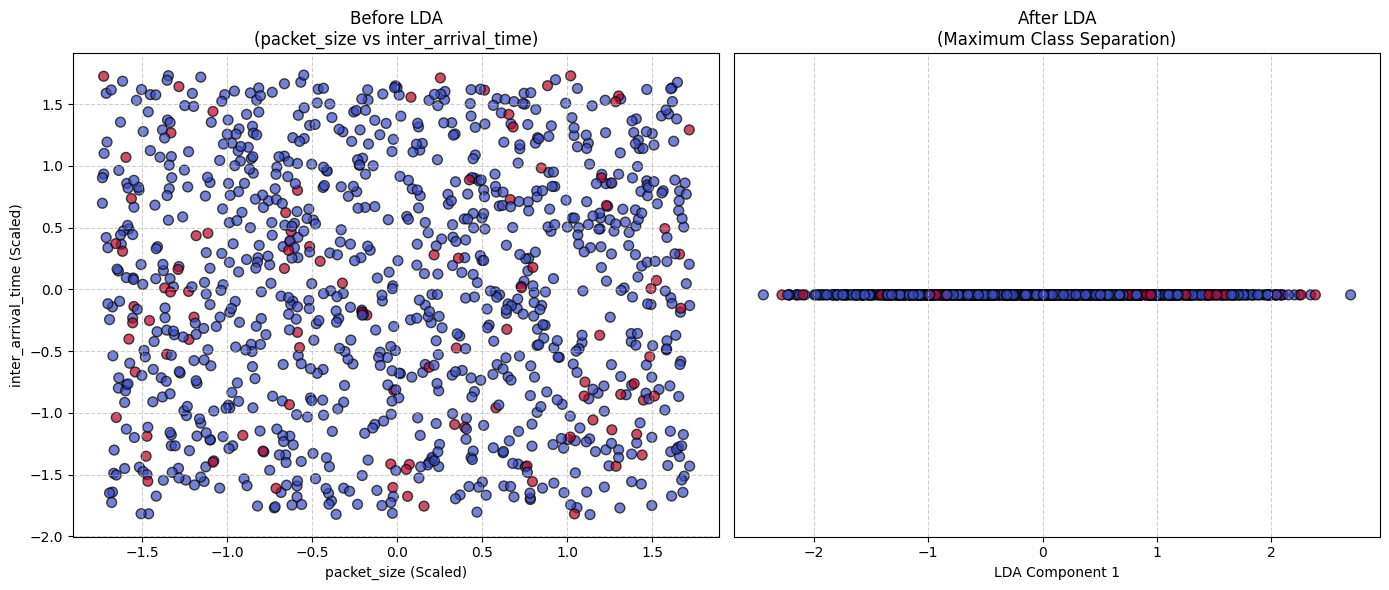

Explained variance ratio: [1.]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# ==========================================
# 2. YOUR LDA PROCESSING CODE (Updated)
# ==========================================

# Load your dataset
df = pd.read_csv("/content/embedded_system_network_security_dataset.csv")

# Drop unnamed columns if exist
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Use 'label' as the target label for LDA
y = df["label"]

# Select numeric columns (all except 'label')
X = df.drop(columns=["label"]).select_dtypes(include='number').copy()

print("Numeric features used for LDA:", X.columns.tolist())

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Create LDA model
# n_components must be < n_classes
n_classes = len(np.unique(y))
lda = LinearDiscriminantAnalysis(n_components=n_classes - 1)

# Fit and transform data
X_lda = lda.fit_transform(X_scaled, y)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_lda.shape[1])

# ==========================================
# 3. PLOTTING
# ==========================================

plt.figure(figsize=(14, 6))

# BEFORE LDA (scatter using the first two numeric features)
plt.subplot(1, 2, 1)
categories = pd.factorize(y)[0]
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            c=categories, cmap='coolwarm', edgecolors='k', s=50, alpha=0.7)
plt.title(f"Before LDA\n({X.columns[0]} vs {X.columns[1]})")
plt.xlabel(X.columns[0] + " (Scaled)")
plt.ylabel(X.columns[1] + " (Scaled)")
plt.grid(True, linestyle='--', alpha=0.6)

# AFTER LDA (1D projection)
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]),
            c=categories, cmap='coolwarm', edgecolors='k', s=50, alpha=0.7)
plt.title("After LDA\n(Maximum Class Separation)")
plt.xlabel("LDA Component 1")
plt.yticks([])
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Explained variance ratio
print("Explained variance ratio:", lda.explained_variance_ratio_)
